### Importing Neccessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = r"Crime_Data.csv"
original_data = pd.read_csv(path)
data = original_data.copy()

In [3]:
data.head()

,Complaint Number,Major Crime Head,Crime Head and Section,Minor Crime Head,Commits,Month
0,371600116,Murder,Sec.302/303 IPC,Others,79.0,Mar-21
1,359273994,Murder,Sec.302/303 IPC,For gain,3.0,Mar-21
2,415805453,Murder,Sec.302/303 IPC,Over Property Dispute,5.0,Mar-21
3,251546004,Murder,Sec.302/303 IPC,Due to Personal Vendetta or enemity,3.0,Mar-21
4,624630216,Murder,Sec.302/303 IPC,Due to Sexual jealousy,0.0,Mar-21


### Data Preprocessing

In [4]:
data['Commits'] = data['Commits'].fillna(0)
data['Commits'] = data['Commits'].astype('int64')
data['Major Crime Head'] = data['Major Crime Head'].apply(lambda x: str.lower(x.strip()))
data['Year'] = data['Month'].apply(lambda x: x.split('-')[1])
mapping = {'21': '2021', '22': '2022', '20': '2020'}
data['Year'] = data['Year'].map(mapping)

## Objective 1

In [5]:
major_crimes = data['Major Crime Head'].value_counts(sort=False)
major_crimes = list(major_crimes.keys())

In [6]:
def get_crime_num_per_year(major_crimes, year, data):
    y = []
    for i, crime_unique in enumerate(major_crimes):
        y_count = 0

        for index, crime in enumerate(data['Major Crime Head']):
            if crime_unique == crime:
                if data['Year'][index] == year:
                    y_count = y_count + data['Commits'][index]    
        y.append(y_count)
    
    return np.array(y)

year_wise_crimes = pd.DataFrame(index=range(len(major_crimes)), columns=['Crimes', '2020', '2021', '2022', 'Total'])

year_wise_crimes['Crimes'] = major_crimes
year_wise_crimes['2020']=get_crime_num_per_year(major_crimes, '2020', data)
year_wise_crimes['2021']=get_crime_num_per_year(major_crimes, '2021', data)
year_wise_crimes['2022']=get_crime_num_per_year(major_crimes, '2022', data)
total = (year_wise_crimes['2022'] + year_wise_crimes['2021'] + year_wise_crimes['2022'])
year_wise_crimes['Total'] = total

In [254]:
year_wise_crimes.describe()

,2020,2021,2022,Total
count,111.000000,111.000000,111.000000,111.000000
mean,1387.684685,1511.459459,1522.369369,4556.198198
std,3604.626416,3820.188377,3947.687058,11688.021313
min,0.000000,0.000000,0.000000,0.000000
25%,5.500000,5.500000,7.000000,20.500000
50%,64.000000,66.000000,54.000000,187.000000
75%,584.500000,610.000000,604.000000,1806.000000
max,24937.000000,25634.000000,26786.000000,79206.000000


## Objective 2

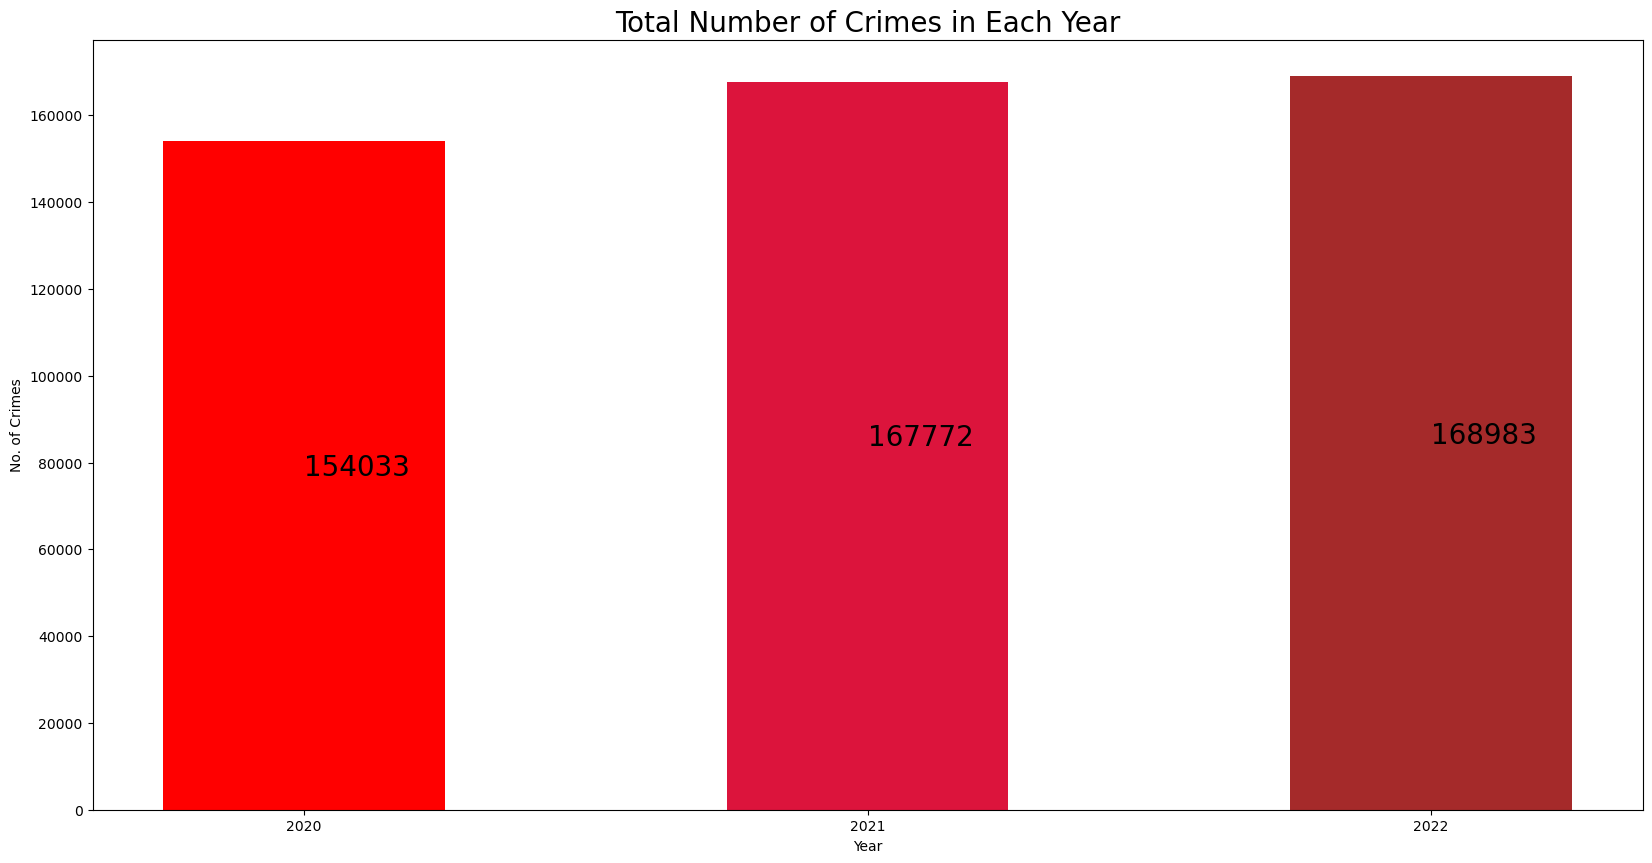

In [7]:
def plot_bar(X, y, color, xlab, ylab):
    plt.title('Total Number of Crimes in Each Year', fontsize=20, color='black')
    plt.bar(X, y, color=color, width=0.5)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.text(X, y/2, y, fontsize=20)

plt.figure(figsize=(20, 10))
plot_bar('2020', sum(year_wise_crimes['2020']), 'red', 'Year', 'No. of Crimes')
plot_bar('2021', sum(year_wise_crimes['2021']), 'crimson', 'Year', 'No. of Crimes')
plot_bar('2022', sum(year_wise_crimes['2022']), 'brown', 'Year', 'No. of Crimes')

## Objective 3

In [8]:
def get(year_month):
    num_of_crimes = []
    for index, month in enumerate(data['Month']):
        if month == year_month:
            num_of_crimes.append(data['Commits'][index])
    
    return sum(num_of_crimes)

In [9]:
X = ('2020 Q1', '2020 Q2', '2020 Q3', '2020 Q4', 
     '2021 Q1', '2021 Q2', '2021 Q3', '2021 Q4', 
     '2022 Q1', '2022 Q2', '2022 Q3', '2022 Q4')

l1 = ['Jan', 'Apr', 'Jul', 'Oct', 'Jan', 'Apr', 'Jul', 'Oct', 'Jan', 'Apr', 'Jul', 'Oct']
l2 = ['Feb', 'May', 'Aug', 'Nov', 'Feb', 'May', 'Aug', 'Nov', 'Feb', 'May', 'Aug', 'Nov']
l3 = ['Mar', 'Jun', 'Sep', 'Dec', 'Mar', 'Jun', 'Sep', 'Dec', 'Mar', 'Jun', 'Jun', 'Dec']

colors1 = ['#CDF7F6', '#8FB8DE', '#9A94BC', '#6A605C']
colors2 = ['#F42272', '#F397D6', '#D7B8F3', '#B8B8F3']
colors3 = ['#A3B4A2', '#38686A', '#2589BD', '#187795']

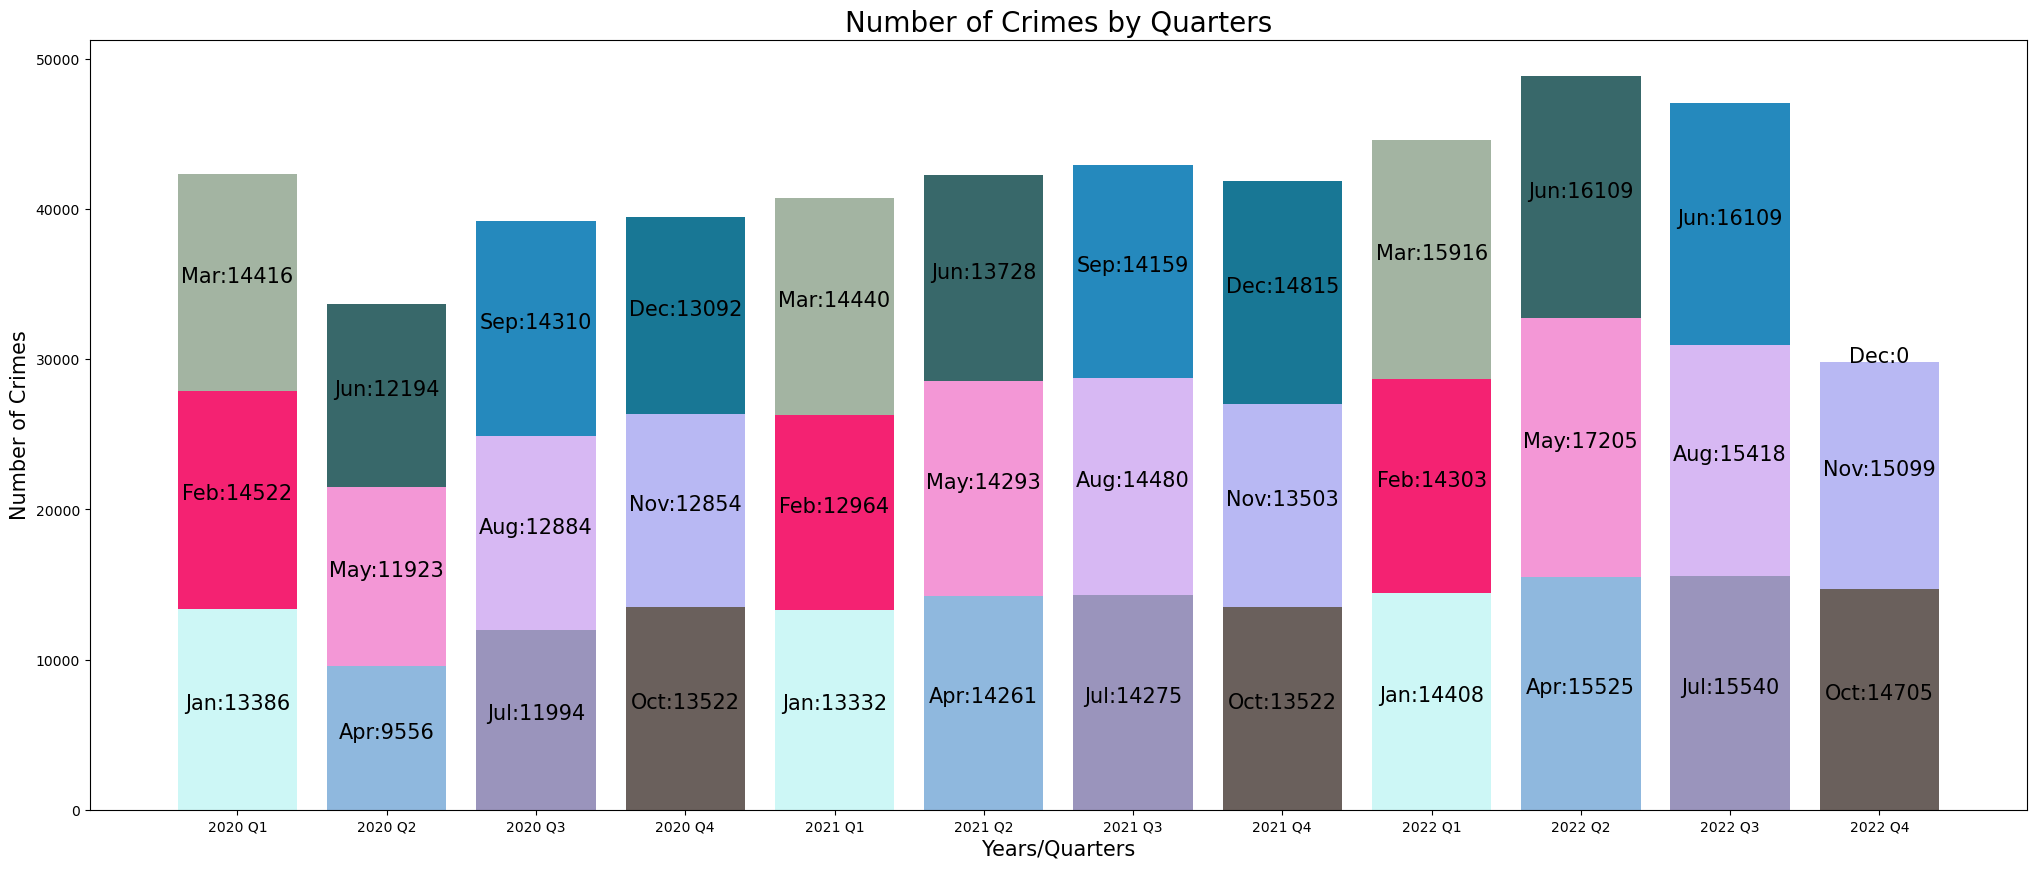

In [10]:
q1 = np.array([get('Jan-20'), get('Apr-20'), get('Jul-20'), get('Oct-21'), get('Jan-21'), get('Apr-21'), get('Jul-21'), get('Oct-21'), get('Jan-22'), get('Apr-22'), get('Jul-22'), get('Oct-22')])
q2 = np.array([get('Feb-20'), get('May-20'), get('Aug-20'), get('Nov-20'), get('Feb-21'), get('May-21'), get('Aug-21'), get('Nov-21'), get('Feb-22'), get('May-22'), get('Aug-22'), get('Nov-22')])
q3 = np.array([get('Mar-20'), get('Jun-20'), get('Sep-20'), get('Dec-20'), get('Mar-21'), get('Jun-21'), get('Sep-21'), get('Dec-21'), get('Mar-22'), get('Jun-22'), get('Jun-22'), get('Dec-22')])

plt.figure(figsize=(25, 10))
plt.title('Number of Crimes by Quarters', fontsize=20)
plt.bar(X, q1, color=colors1)
plt.bar(X, q2, bottom=q1, color=colors2)
plt.bar(X, q3, bottom=q1+q2, color=colors3)
plt.xlabel('Years/Quarters', fontsize=15)
plt.ylabel('Number of Crimes', fontsize=15)

for (x, y1, y2, y3, val1, val2, val3) in zip(X, l1, l2, l3,  q1, q2, q3):
    plt.text(x, val1/2, f'{y1}:{val1}', ha='center', fontsize=15)
    plt.text(x, val1+val2/2, f'{y2}:{val2}', ha='center', fontsize=15)
    plt.text(x, val1+val2+val3/2, f'{y3}:{val3}', ha='center', fontsize=15)
    
plt.show()

## Objective 4

In [11]:
def get_crime_num_per_month(months, crime, year):
    crime_num = []
    for month in months:
        month = month + '-' + year
        mon_data = data[data['Month'] == month].reset_index(drop=True)
        crimes = mon_data[mon_data['Major Crime Head'] == crime]['Commits']
        crime_num.append(sum(crimes))
    monthly_crimes.update({crime: crime_num})

In [12]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Nov', 'Dec']
crimes = ['murder', 'robbery', 'pocso', 'kidnapping and abduction', 'burglary - night', 'cheating', 'cases of hurt', 
          'motor vehicle accidents non-fatal', 'motor vehicle accidents fatal', 'molestation', 'cyber crime']

monthly_crimes = {}
for crime in crimes:
    get_crime_num_per_month(months, crime, '20')

num_crimes = list(monthly_crimes.values())

In [13]:
def plot_line(months, y1, y2, y3):
    colors = ['red', 'powderblue', 'grey', 'lightgreen', 'ivory']
    
    plt.figure(figsize=(25, 10))
    plt.title('Time line of Crimes', fontsize=20)
    
    plt.plot(months, y1, c=colors[0])
    plt.plot(months, y2, c=colors[1])
    plt.plot(months, y3, c=colors[2])
    for v1, v2, v3, month in zip(y1, y2, y3, months):
        plt.text(month, v1, v1, fontsize=12)
        plt.text(month, v2, v2, fontsize=12)
        plt.text(month, v3, v3, fontsize=12)

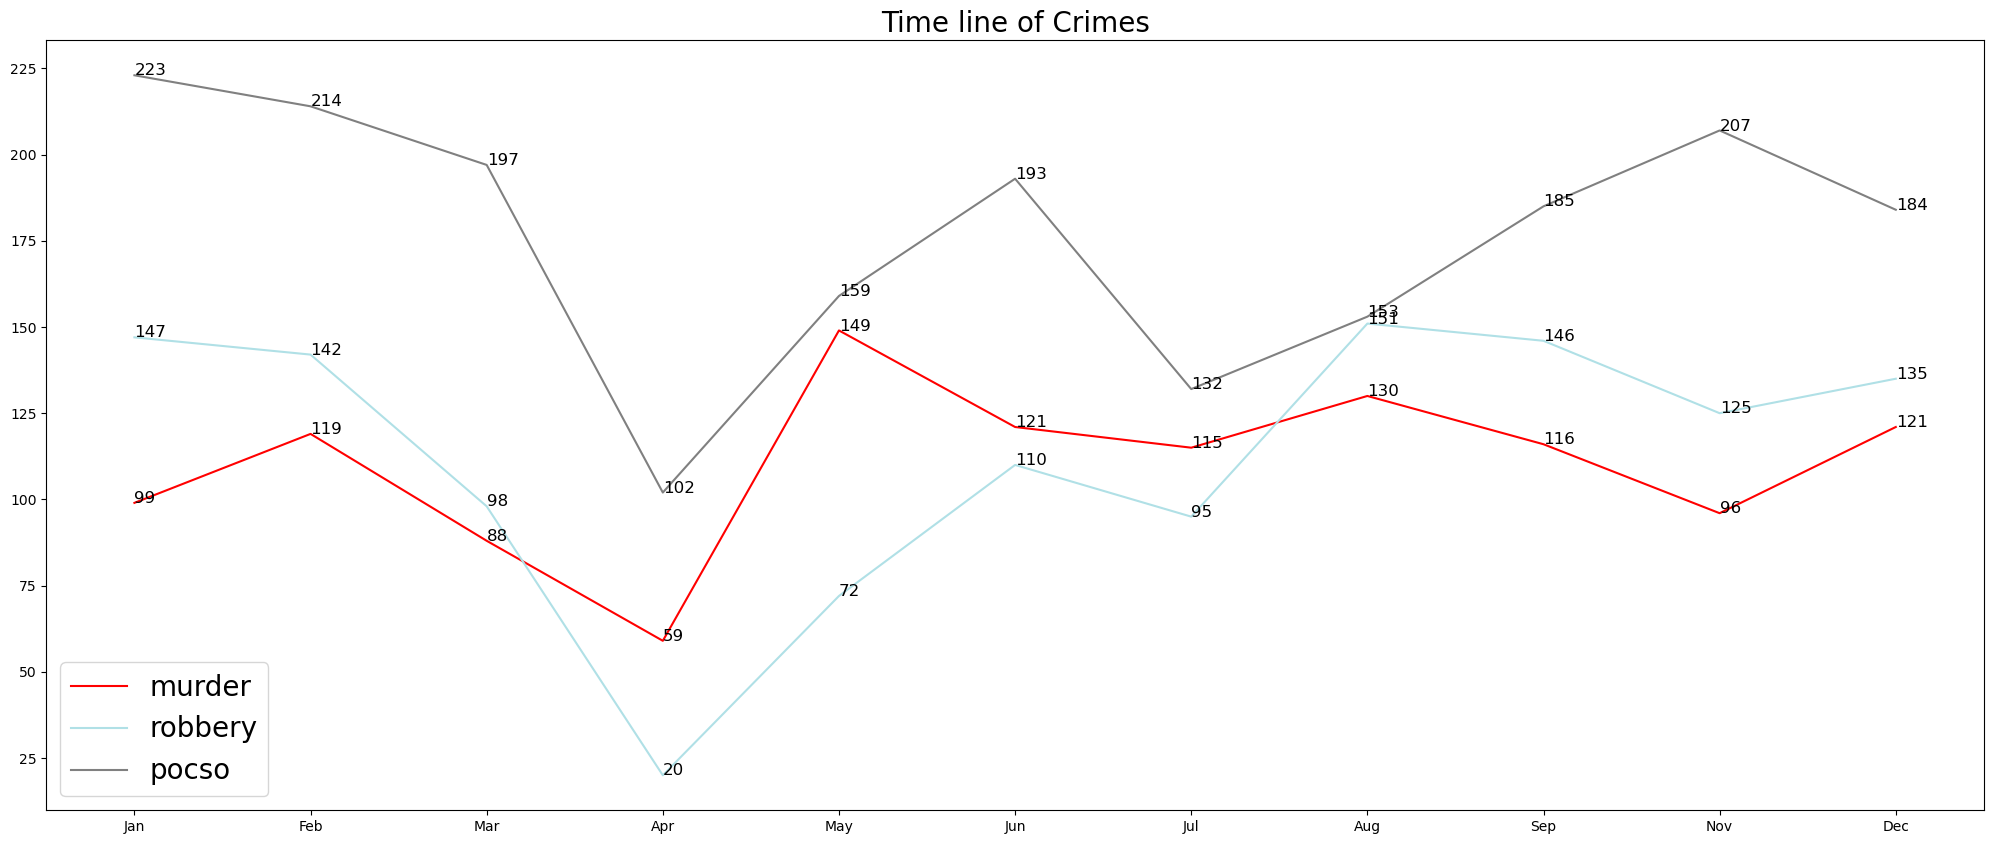

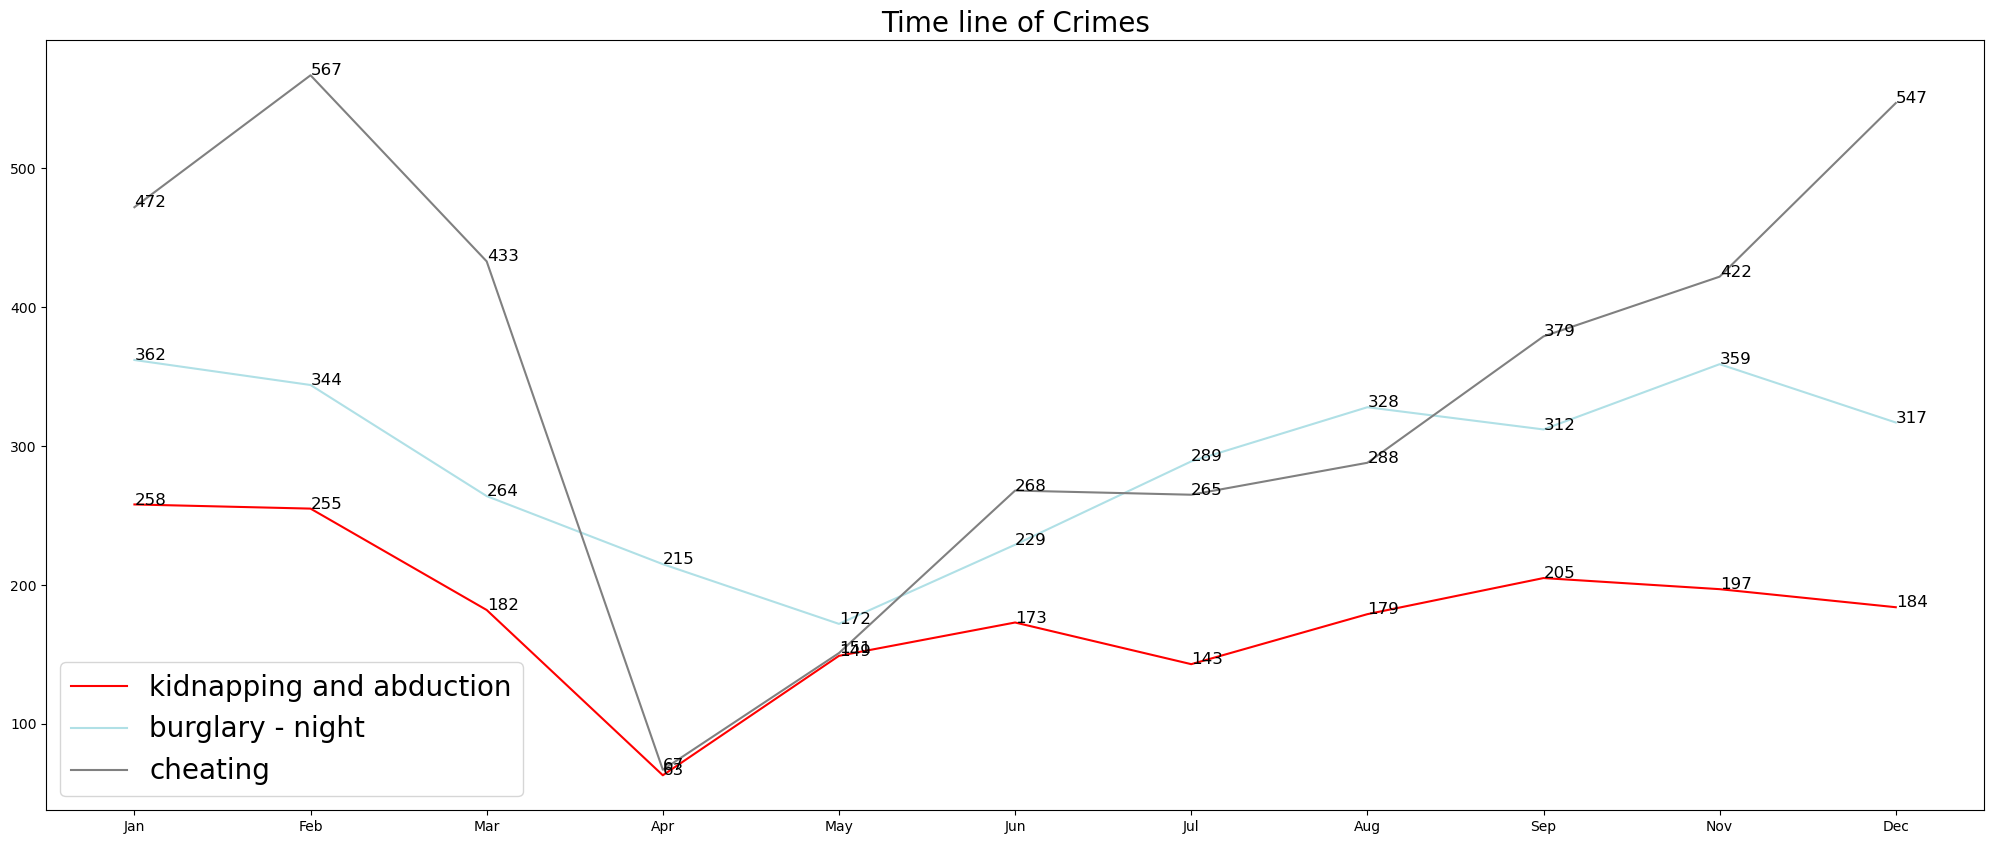

In [209]:
plot_line(months, num_crimes[0], num_crimes[1], num_crimes[2])
plt.legend([crimes[0], crimes[1], crimes[2]], fontsize=20)

plot_line(months, num_crimes[3], num_crimes[4], num_crimes[5])
plt.legend([crimes[3], crimes[4], crimes[5]], fontsize=20)

plt.show()

## Objective 5

In [187]:
years = ['2020', '2021', '2022']
def get_particular_crime_count(crime):
    year_count = {}
    for year in years:
        get_crime_num_per_month(months, crime, year[2:])
        crimes = list(monthly_crimes.values())
        year_count.update({year: crimes})
    
    return year_count

def plot_bars(values, title, xaxis, colors, legends): 
    y20 = values[0]
    y21 = values[1]
    y22 = values[2]

    indent = np.arange(len(xaxis))
    width = 0.25

    plt.figure(figsize=(25, 10))
    plt.xticks(indent+width, xaxis)
    plt.title(title, fontsize=25)

    plt.bar(indent, y20, width, color=colors[0])
    plt.bar(indent+width, y21, width, color=colors[1])
    plt.bar(indent+width*2, y22, width, color=colors[2])
    plt.legend(legends, fontsize =20)

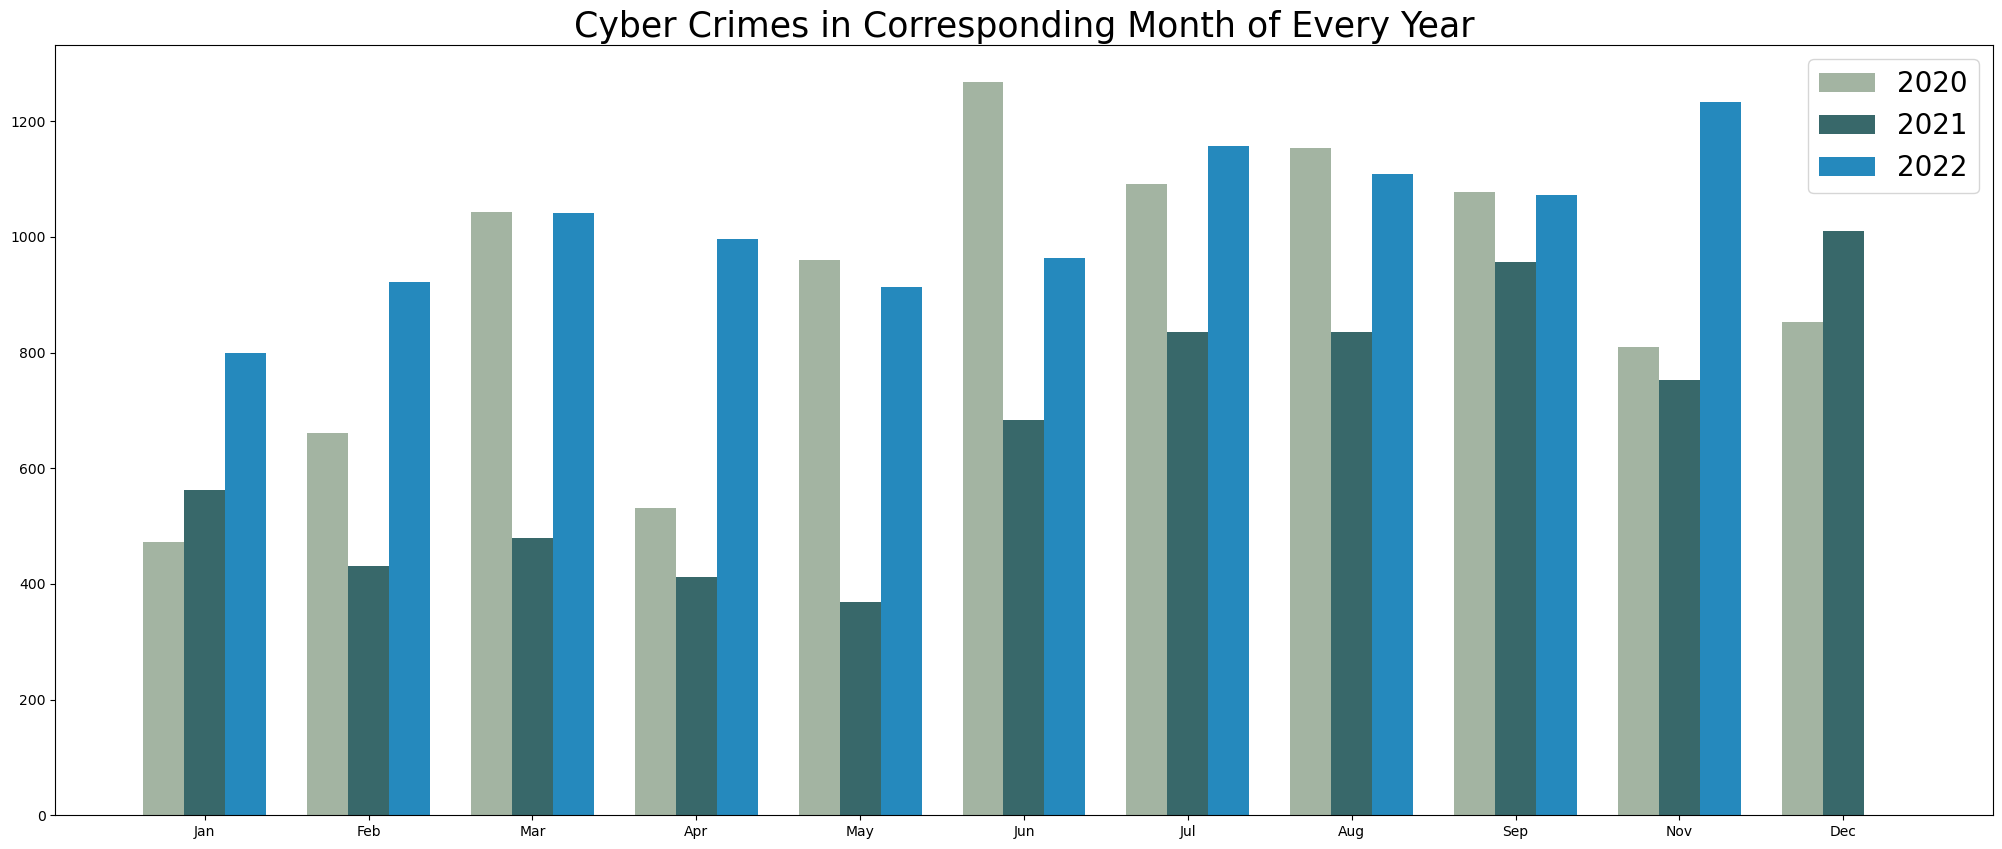

In [179]:
monthly_crimes = {}
year_count = get_particular_crime_count('cyber crime')
year_count = list(year_count.values())
year_count = np.array(year_count).reshape(-1, 11)
plot_bars(year_count, 'Cyber Crimes in Corresponding Month of Every Year', months,  colors3, years)

## Objective 6

In [20]:
df = data.copy()
df['Month'] = df['Month'].apply(lambda x: x.split('-')[0])

def percentage(x, values):
    absolute = int(x / np.sum(values) * 100)
    return f"{round(x, 2)}%"

In [21]:
def get_crime_motive_count(data, crime, by_year=False, year=None):
    df = data.loc[data['Major Crime Head'] == crime][['Minor Crime Head', 'Commits', 'Year']]
    if by_year:
        df = df.loc[df['Year']==year]
    df = df.groupby('Minor Crime Head').sum().reset_index()
    df = df.sort_values('Commits', ascending=False)[:5]
    return (df)

def plot_pie(values, labels, title):
    colors = ['#CDF7F6', '#8FB8DE', '#9A94BC', '#6A605C', '#F42272', '#F397D6', '#D7B8F3', '#B8B8F3', '#187795']
    wp = { 'linewidth' : 1, 'edgecolor' : "black" }
    explode = [0.05] * len(values)
    
    plt.figure(figsize=(5, 15))
    plt.title(title)
    
    plt.pie(values, 
            labels=labels, 
            autopct=lambda x: percentage(x, values), 
            labeldistance=None, pctdistance=0.7, 
            wedgeprops = wp, explode=explode, colors=colors)
    
    plt.legend(loc=(1, 0.5))

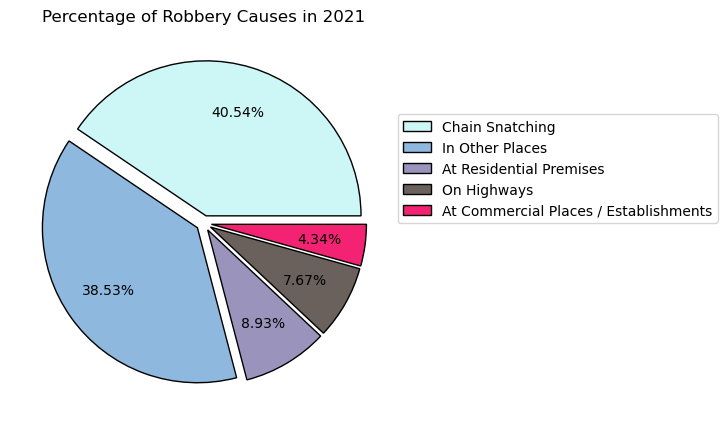

In [22]:
df_motive = get_crime_motive_count(df, 'robbery', by_year=True, year='2021')
labels = df_motive['Minor Crime Head']
values = df_motive['Commits']

plot_pie(values, labels, 'Percentage of Robbery Causes in 2021')
plt.show()

## Objective 6

In [93]:
def get_crime_sections(data, year):
    df = data[data['Year'] == year].reset_index(drop=True)
    df['Crime Head and Section'] = df['Crime Head and Section'].fillna('NA')
    ipc = 0
    sll = 0
    
    for index in range(len(df)):
        if 'IPC' in df['Crime Head and Section'][index]:
            ipc = ipc + df['Commits'][index]
        else:
            sll = sll + df['Commits'][index]
    
    return ipc, sll

In [159]:
ipc20, ssl20 = get_crime_sections(data, '2020')
total20 = sum(get_crime_sections(data, '2020'))

ipc21, ssl21 = get_crime_sections(data, '2021')
total21 = sum(get_crime_sections(data, '2021'))

ipc22, ssl22 = get_crime_sections(data, '2022')
total22 = sum(get_crime_sections(data, '2022'))

crime_sections = [[ipc20, ipc21, ipc22], [ssl20, ssl21, ssl22], [total20, total21, total22]]

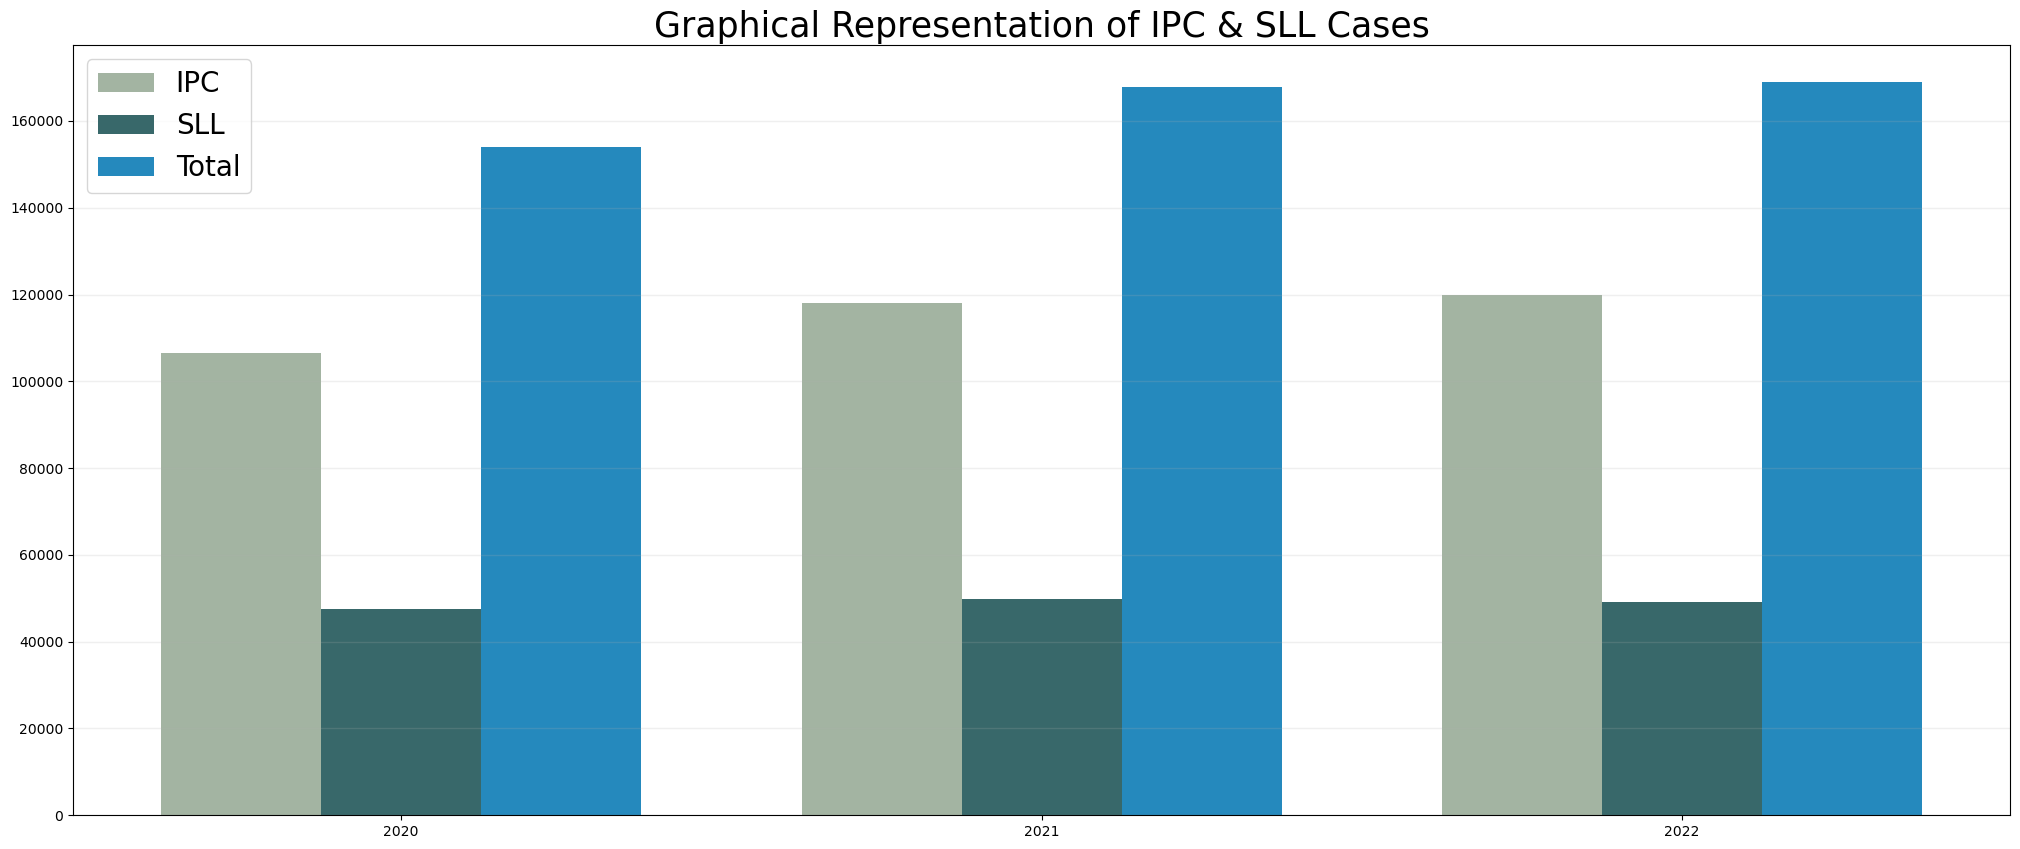

In [207]:
legends = ['IPC', 'SLL', 'Total']

plot_bars(crime_sections, 'Graphical Representation of IPC & SLL Cases', years, colors3, legends)
plt.grid(axis='y', alpha=0.2, linewidth=1)